In [124]:
import numpy as np
import matplotlib.pyplot as plt
barker7 = ([1,1,1,-1,-1,1,-1])

In [125]:
convolved = np.correlate(barker7, barker7, mode='full') #pad barker7 (or x) with 0s

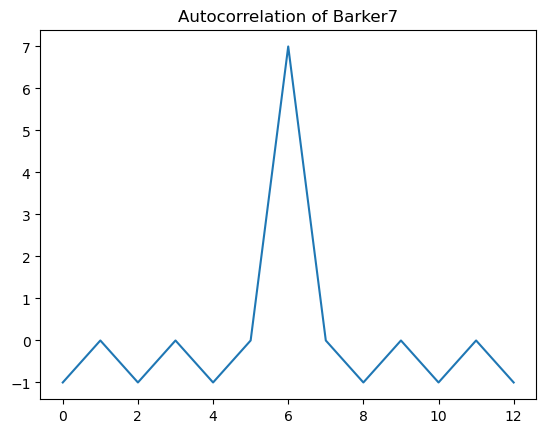

In [126]:
plt.title('Autocorrelation of Barker7')
plt.plot(convolved)
plt.show()


In [127]:
randomVector = np.random.randint(0, 2, 10)
randomVector[np.where(randomVector == 0)] = -1

In [128]:
randomVector

array([ 1,  1,  1,  1, -1,  1,  1,  1, -1,  1])

In [129]:
possibleSignal = np.append(randomVector, barker7)

In [130]:
possibleSignal

array([ 1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1, -1])

In [131]:
findBarkerInSignal = np.correlate(possibleSignal, barker7, mode='full') #pad barker7 (or x) with 0s

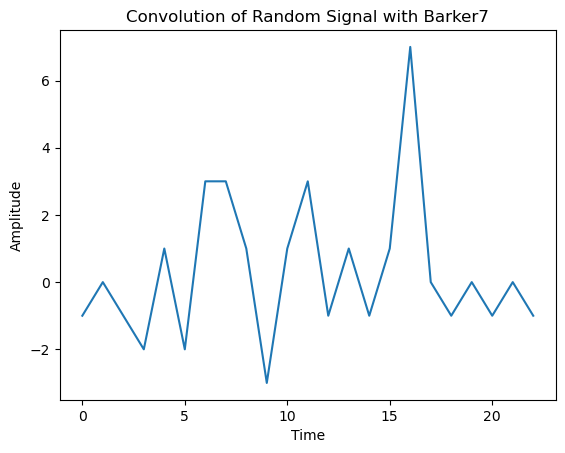

In [132]:
plt.title('Convolution of Random Signal with Barker7')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(findBarkerInSignal)
plt.show()


In [133]:
'''
1. Try to introduce insertions, substitutions and deletions and see what happens to the autocorrelation of barker with itself.
2. Implement barker 13 and 11.
3. Implement a barker code with values 1,-1,i,-i
'''

'\n1. Try to introduce insertions, substitutions and deletions and see what happens to the autocorrelation of barker with itself.\n2. Implement barker 13 and 11.\n3. Implement a barker code with values 1,-1,i,-i\n'

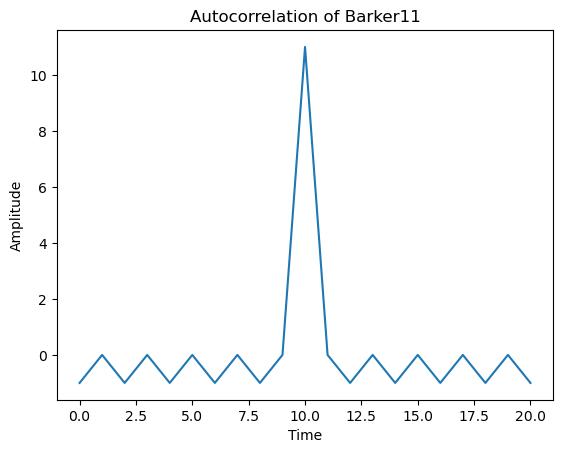

In [134]:
#Barker 11
barker11 = [+1, +1, +1, -1, -1, -1, +1, -1, -1, +1, -1]
autocorr11 = np.correlate(barker11, barker11, mode='full')
plt.title('Autocorrelation of Barker11')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(autocorr11)
plt.show()


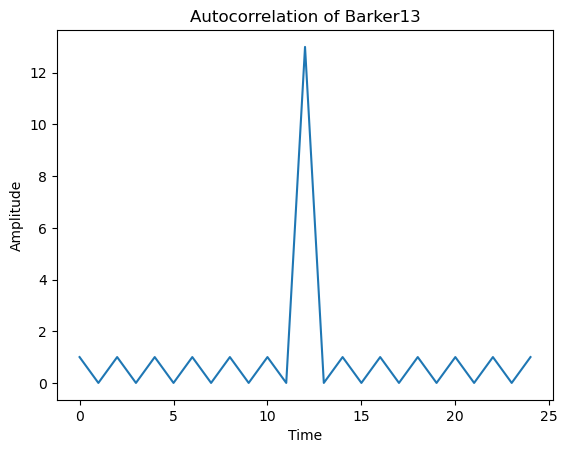

In [135]:
#Barker 13
barker13 = [+1, +1, +1, +1, +1, -1, -1, +1, +1, -1, +1, -1, +1]
autocorr11 = np.correlate(barker13, barker13, mode='full')
plt.title('Autocorrelation of Barker13')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot(autocorr11)
plt.show()

In [136]:
#Finding barker 11 and 13 in random signals 

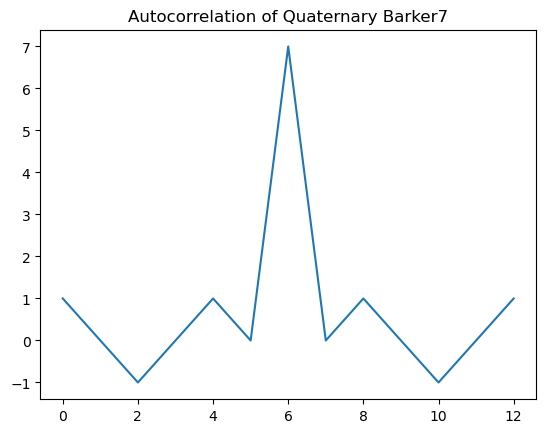

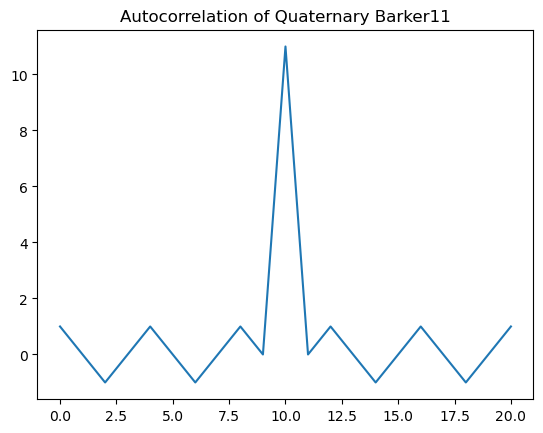

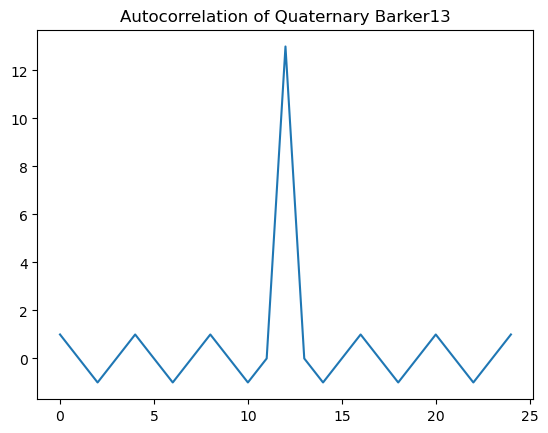

In [137]:
#Barker code with quarternary symbols: +/- 1 and +/-i
quat1 = [1]
quat2 = [1, 1j]
quat3 = [1, 1j, 1]
quat4 = [1, 1j, -1, 1j]
quat5 = [1, 1j, -1, 1j, 1]
quat7 = [1, 1j, -1, 1j, -1, 1j, 1]
quat11 = [1, 1j, -1, 1j, -1, -1j, -1, 1j, -1, 1j, 1]
quat13 = [1, 1j, -1, -1j, 1, -1j, 1, -1j, 1, -1j, -1, 1j, 1]

autocorrQuat7 = np.correlate(quat7, quat7, mode='full')
plt.title('Autocorrelation of Quaternary Barker7')
plt.plot(autocorrQuat7)
plt.show()

autocorrQuat11 = np.correlate(quat11, quat11, mode='full')
plt.title('Autocorrelation of Quaternary Barker11')
plt.plot(autocorrQuat11)
plt.show()

autocorrQuat13 = np.correlate(quat13, quat13, mode='full')
plt.title('Autocorrelation of Quaternary Barker13')
plt.plot(autocorrQuat13)
plt.show()


In [138]:
#Error: insertion,substitution, and deletions - barker 11 and 13 autocorreleation 